# Análisis de Supuestos

Cuando se realiza una regresión lineal, se asume que los datos cumplen ciertos supuestos. Si estos supuestos no se cumplen, los resultados del modelo pueden no ser válidos. A continuación damos una explicación de cada uno de estos supuestos y cómo se verifican:


Primero carguemos los datos a utilizar y el modelo, con igual valor de variables del archivo de regresion lineal. 

Variables independientes : `teamSkill`, `Experience`, `Overtakes`

Variable a predecir (dependiente): `ReactionTime`

Para ello hagamos un estudio por escudería

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the data
data = pd.read_csv("formula1_enhanced_data_final.csv")

# Select relevant features and target
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Initialize a dictionary to store R² values for each team
team_r_squared = {}

# Iterate through unique teams
for team in data['Team'].unique():
    team_data = data[data['Team'] == team]
    
    # Check if we have enough data for this team
    if len(team_data) < 10:  # You might want to adjust this threshold
        print(f"Skipping {team} due to insufficient data")
        continue

    # Prepare the data
    X = team_data[features]
    y = team_data[target]

    # Handle missing values
    X = X.dropna()
    y = y[X.index]

    # Check if we still have enough data after dropping NA values
    if len(X) < 10:
        print(f"Skipping {team} due to insufficient data after removing NA values")
        continue

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Calculate R-squared
    r_squared = model.score(X_test_scaled, y_test)
    
    # Store the R² value
    team_r_squared[team] = r_squared

# Sort teams by R² value
sorted_teams = sorted(team_r_squared.items(), key=lambda x: x[1], reverse=True)

# Print results
print("\nR² values for each team:")
for team, r_squared in sorted_teams:
    print(f"{team}: R² = {r_squared:.4f}")

# Calculate and print the average R² across all teams
average_r_squared = np.mean(list(team_r_squared.values()))
print(f"\nAverage R² across all teams: {average_r_squared:.4f}")

# Find the team with the highest R²
best_team = max(team_r_squared, key=team_r_squared.get)
print(f"\nteam with the highest R²: {best_team} (R² = {team_r_squared[best_team]:.4f})")

# Find the team with the lowest R²
worst_team = min(team_r_squared, key=team_r_squared.get)
print(f"team with the lowest R²: {worst_team} (R² = {circuit_r_squared[worst_circuit]:.4f})")





R² values for each team:
Aston Martin: R² = 0.7140
Alpine: R² = 0.6154
Red Bull: R² = 0.5974
Alfa Romeo: R² = 0.5697
AlphaTauri: R² = 0.5511
McLaren: R² = 0.5422
Haas: R² = 0.5186
Ferrari: R² = 0.4113
Mercedes: R² = 0.1394
Williams: R² = -0.1761

Average R² across all teams: 0.4483

team with the highest R²: Aston Martin (R² = 0.7140)
team with the lowest R²: Williams (R² = -0.1761)


Consideremos entonces la expresión de la regresión lineal de la escudería de Red Bull.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import io
from urllib.request import urlopen


# Print column names
print("Available columns:")
print(data.columns.tolist())

# Select a specific team (for example, let's use 'Hamilton')
team_name = 'Red Bull'
team_data = data[data['Team'] == team_name].copy()

if team_data.empty:
    print(f"No data found for team {team_name}")
    print("Available teams:")
    print(data['Team'].unique())
    exit()

print(f"\nAnalyzing data for team: {team_name}")
print(f"Number of races: {len(team_data)}")

# Select relevant features
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Check if columns exist and remove those that don't
features = [f for f in features if f in data.columns]
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset")

print(f"\nUsing features: {features}")
print(f"Target: {target}")
for feature in features:
    team_data[feature] = pd.to_numeric(team_data[feature], errors='coerce')
team_data = team_data.dropna(subset=features + [target])

# Split the data for the selected team (only Hamilton's data)
X = team_data[features]
y = team_data[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

for feature in features:
    team_data[feature] = pd.to_numeric(team_data[feature], errors='coerce')

# Eliminando las filas con valores faltantes
team_data = team_data.dropna(subset=features + [target])

# Definiendo las variables X (independientes) y y (dependiente)
X = team_data[features]
y = team_data[target]

# Añadiendo una constante (intercepto) a las variables independientes
X = sm.add_constant(X)

# Ajustando el modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Mostrando el resumen del modelo
print(model.summary())


Available columns:
['Date', 'Driver', 'Age', 'Team', 'Circuit', 'PitStopTime', 'ReactionTime', 'FinalPosition', 'DNF', 'Points', 'MaxSpeed', 'Overtakes', 'Experience', 'DriverSkill', 'CarPerformance', 'TrackFamiliarity', 'WeatherCondition', 'TyreCompound', 'EngineMode', 'QualifyingPosition', 'TyreWear', 'FuelConsumption', 'DownforceLevel', 'FinalRaceTime']

Analyzing data for team: Red Bull
Number of races: 47

Using features: ['DriverSkill', 'Experience', 'Overtakes']
Target: ReactionTime
                            OLS Regression Results                            
Dep. Variable:           ReactionTime   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     13.37
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           2.67e-06
Time:                        00:40:18   Log-Likelihood:                 109.94
No. Observations:              

## Linealidad

- **Qué es**: Este supuesto indica que la relación entre las variables independientes y la variable dependiente es lineal. Es decir, la variable dependiente cambia de forma proporcional con las independientes.

- **Herramienta**: Gráfico de Pares (Pairplot)

Un pairplot genera gráficos de dispersión entre todas las variables, mostrando las relaciones entre ellas.
Objetivo: A través de este gráfico, buscamos ver si hay una relación lineal entre las variables independientes (por ejemplo, DownforceLevel) y la dependiente (como MaxSpeed).
Interpretación: Si las relaciones visualizadas parecen seguir una línea recta, podemos decir que se cumple el supuesto de linealidad.


Analyzing data for team: Red Bull
Number of races: 47


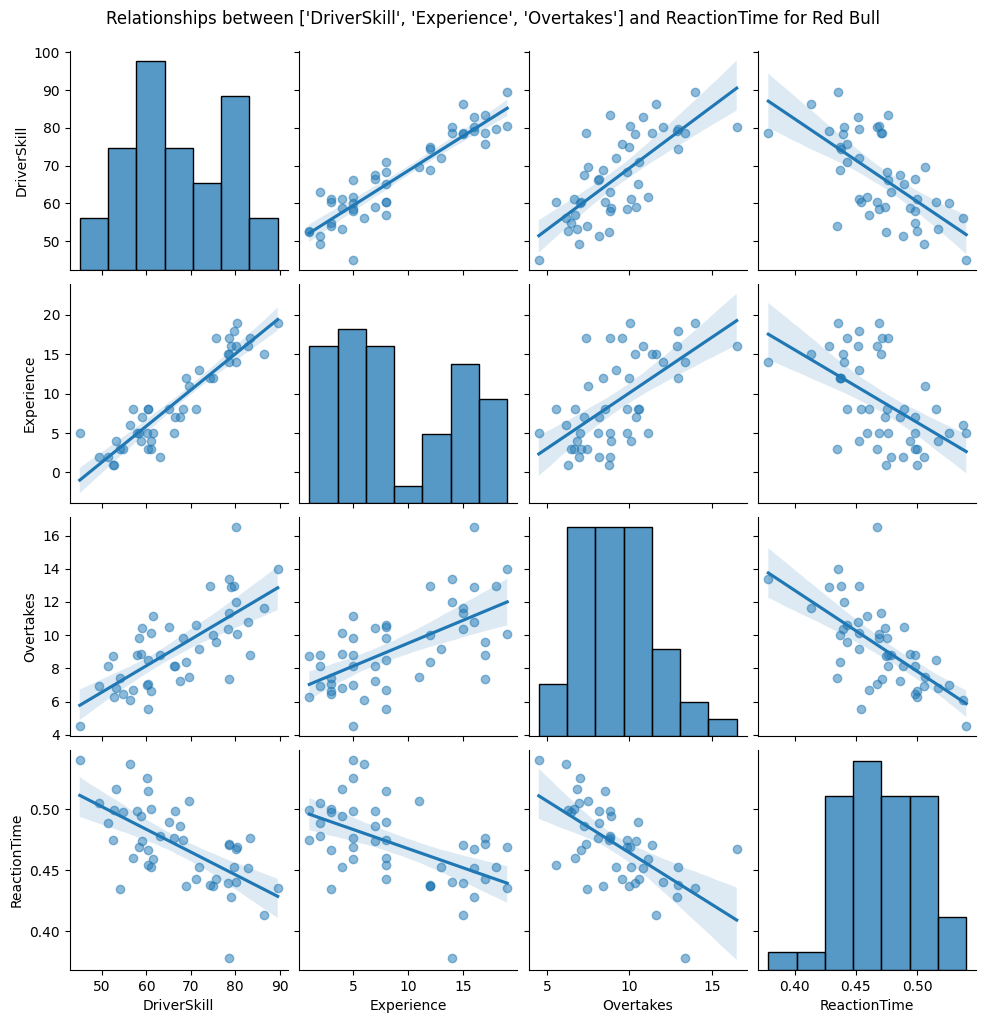

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Cargar los datos (asegúrate de tener el archivo CSV en la misma carpeta o proporciona la ruta correcta)
data = pd.read_csv('formula1_enhanced_data_final.csv')

# Filtrar los datos para un equipo específico, por ejemplo, 'Red Bull'
team_name = 'Red Bull'
team_data = data[data['Team'] == team_name].copy()

if team_data.empty:
    print(f"No data found for team {team_name}")
    print("Available teams:")
    print(data['Team'].unique())
    exit()

print(f"\nAnalyzing data for team: {team_name}")
print(f"Number of races: {len(team_data)}")

# Seleccionar las variables relevantes
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Comprobar si las columnas existen y eliminar aquellas que no
features = [f for f in features if f in data.columns]
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset")

# Limpiar datos nulos
for feature in features:
    team_data[feature] = pd.to_numeric(team_data[feature], errors='coerce')
team_data = team_data.dropna(subset=features + [target])

# Crear el gráfico de pares (pairplot)
sns.pairplot(team_data[features + [target]], kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.suptitle(f'Relationships between {features} and {target} for {team_name}', y=1.02)
plt.show()


## Normalidad de los Residuos

- **Qué es**: Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo. Este supuesto indica que los residuos deben seguir una distribución normal, lo cual es importante para hacer inferencias estadísticas válidas.

- **Herramientas para verificar la normalidad**:

1. `Histograma de los residuos`
El histograma de los residuos muestra cómo se distribuyen estos errores. Si la distribución de los residuos se parece a una curva de campana (distribución normal), el supuesto se cumple.

2. `Test de Shapiro-Wilk`
Este es un test estadístico que evalúa si los residuos siguen una distribución normal.
Interpretación del p-value:
Si el p-value es mayor que 0.05, significa que no podemos rechazar la hipótesis nula de que los residuos son normales (por lo tanto, el supuesto de normalidad se cumple).
Si el p-value es menor que 0.05, los residuos no siguen una distribución normal y el modelo puede no ser válido.


## Homocedasticidad

- **Qué es**: Este supuesto afirma que la varianza de los residuos debe ser constante para todos los valores de las predicciones. Si la varianza de los residuos cambia (es decir, es más grande para ciertos valores de la variable dependiente), se dice que hay heterocedasticidad.

- **Herramientas para verificar la homocedasticidad**:

1. `Gráfico de Predicciones vs Residuos`
En este gráfico se comparan los residuos con las predicciones generadas por el modelo.Interpretación: Si los residuos se dispersan de manera uniforme alrededor de cero en todo el rango de predicciones (sin formar patrones), el supuesto de homocedasticidad se cumple. Si los residuos se agrupan o dispersan de manera no uniforme, puede haber heterocedasticidad.

2. `Test de Breusch-Pagan`
Este test estadístico evalúa la existencia de heterocedasticidad en el modelo.
Interpretación del p-value:
Si el p-value es mayor que 0.05, el modelo no presenta heterocedasticidad, lo que significa que se cumple el supuesto de homocedasticidad.
Si el p-value es menor que 0.05, indica heterocedasticidad, lo cual es problemático para el modelo.

## No Multiconealidad

Qué es: La multicolinealidad se refiere a una alta correlación entre las variables independientes. Si las variables independientes están altamente correlacionadas, puede ser difícil distinguir sus efectos individuales sobre la variable dependiente.

Herramientas para verificar la multicolinealidad:

Matriz de correlación
Se calcula la correlación entre todas las variables independientes. Correlaciones altas (por ejemplo, mayores a 0.8 o 0.9) pueden indicar que las variables están altamente correlacionadas, lo cual puede causar problemas en la interpretación del modelo.
Interpretación: Si las variables tienen correlaciones muy altas entre sí, se debería considerar eliminar o combinar algunas variables para reducir la multicolinealidad.
Variance Inflation Factor (VIF)
El VIF mide cuánto se ha inflado la varianza de los coeficientes debido a la colinealidad entre las variables independientes.
Interpretación:
Un VIF mayor a 10 indica una alta multicolinealidad y sugiere que la variable puede estar causando un problema en el modelo.
Un VIF bajo (por debajo de 5) sugiere que la multicolinealidad no es un problema.